In [1]:
import pandas as pd
import numpy as np
import time
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
path='G:/BigDataNote/testData/household_power_consumption/household_power_consumption.txt'
names=['Date','Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

In [3]:
#读取数据
df = pd.read_csv(path,sep=';')

In [4]:
#打印了前五行数据
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
#看所有的变量值
for i in df.columns:
    print df[i].value_counts()

17/12/2006    604
16/12/2006    396
Name: Date, dtype: int64
09:28:00    1
05:29:00    1
21:20:00    1
08:27:00    1
18:41:00    1
06:33:00    1
03:08:00    1
07:49:00    1
02:53:00    1
08:36:00    1
09:33:00    1
21:11:00    1
01:28:00    1
06:44:00    1
01:16:00    1
03:17:00    1
09:39:00    1
08:17:00    1
23:52:00    1
09:09:00    1
09:21:00    1
20:35:00    1
22:48:00    1
23:50:00    1
05:26:00    1
20:15:00    1
22:27:00    1
18:46:00    1
23:32:00    1
21:13:00    1
           ..
22:45:00    1
20:24:00    1
19:16:00    1
19:18:00    1
05:57:00    1
18:06:00    1
06:41:00    1
22:58:00    1
18:11:00    1
08:57:00    1
21:16:00    1
05:04:00    1
18:49:00    1
04:17:00    1
23:19:00    1
19:55:00    1
21:35:00    1
23:44:00    1
04:52:00    1
00:14:00    1
18:04:00    1
10:00:00    1
02:56:00    1
01:04:00    1
19:06:00    1
18:13:00    1
22:42:00    1
21:10:00    1
08:21:00    1
20:27:00    1
Name: Time, Length: 1000, dtype: int64
2.426    10
2.346     7
2.336     6
2.308     

In [6]:
#空值的处理
new_df = df.replace('?',np.nan)
datas = new_df.dropna(how='any')

In [7]:
#创建一个时间字符串格式化
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S')
    return(t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)

In [8]:
#获取X，Y变量，讲时间转换为数值型的连续变量
X = datas[names[0:2]]
X = X.apply(lambda x :pd.Series(date_format(x)),axis=1)
Y = datas[names[2]]

In [9]:
print X.head(5)
print Y.head(5)

      0   1   2   3   4  5
0  2006  12  16  17  24  0
1  2006  12  16  17  25  0
2  2006  12  16  17  26  0
3  2006  12  16  17  27  0
4  2006  12  16  17  28  0
0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64


In [10]:
#对数据集进行训练集、测试集划分
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
#数据标准化
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [12]:
#训练模型
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#模型检验
print "准确率：",lr.score(X_train,Y_train)

准确率： 0.244093118059


In [15]:
#预测y值
y_predict = lr.predict(X_test)

In [16]:
from sklearn.externals import joblib
#模型保存
joblib.dump(ss,"data_ss.model")
joblib.dump(lr,"data_lr.model")
#加载模型
joblib.load("data_ss.model")
joblib.load("data_lr.model")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

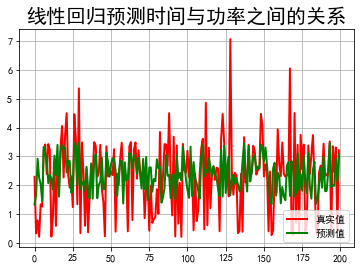

In [26]:
#预测值与实际值画(图比较
t = np.arange(len(X_test))
# 画布背景色白色
plt.figure(facecolor='w')
plt.plot(t,Y_test,'r-',linewidth=2,label=u'真实值')
plt.plot(t,y_predict,'g-',linewidth=2,label=u'预测值')   
plt.legend(loc='lower right')
plt.title(u'线性回归预测时间与功率之间的关系',fontsize=20)
# 显示网格线
plt.grid(b=True)
plt.show()